Title: Evaluation of Aqueous Solubility Model's(eos6oli) Bias On Predicting With 1000 Molecules.
Aim of the project:
To Source for 1000 molecules from the public repositories.
Run prediction on the 1000 molecules using the model Solubility Prediction Model(eos6oli).
Check for model's bias, evaluate, and visualize the model's performance.


In [ ]:

#Installing necessary Libraries and specifying path to relevant folders
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sys
sys.path.append('/content/drive/MyDrive/ersilia/src')


#let's first install rdkit & standardiser
!pip install rdkit
!pip install standardiser

!pip install rdkit
!pip install standardiser
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
from rdkit import RDLogger
import logging
from os import path, remove
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Disable warning messages
logging.getLogger("standardiser.standardise").setLevel(logging.ERROR)
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')

sys.path.append('../src')
DATAPATH = "../data"
FIGUREPATH = "../figures/"


In [97]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

# connecting google colab to Google Drive and To Mount google drive

In [98]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Creating a path for the folder

In [99]:
# specifying the input folder
input_folder = "/content/drive/MyDrive/Ersilia"    # @param {type:"string"}

In [100]:
# specifying the output folder

output_folder = "/content/drive/MyDrive/Ersilia"   # @param {type:"string"}

In [102]:
# The name smiles is used because that is the column header name in the reference_library
smiles_column = "smiles"  # @param {type:"string"}

# Evaluation of the Model Bias

In [103]:
#Download and fetch the model

model_name = "eos6oli"

import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")




⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:56543
   PID: 58732
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 199.09 seconds


In [108]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:37999
   PID: 59288
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [109]:
# specifying the name of my input csv file

input_filename = "eml_canonical"


In [110]:
# specifying the SMILES column name
smiles_column = "can_smiles"

# Extracting smiles to be in a list format

In [111]:
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")


My dataset contains 442 SMILES


In [112]:
#Running the predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()


Successful 👍! Time taken: 43.75 seconds


In [113]:
# Checking the results

print(output.head())

                           key  \
0  MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1  GZOSMCIZMLWJML-VJLLXTKPSA-N   
2  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3  QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4  PWKSKIMOESPYIA-BYPYZUCNSA-N   

                                               input  solubility  
0      Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1      -2.332  
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      -5.090  
2                         CC(=O)Nc1nnc(S(N)(=O)=O)s1      -1.242  
3                                            CC(=O)O       1.229  
4                            CC(=O)N[C@@H](CS)C(=O)O      -0.308  


In [114]:
#Saving the results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

In [115]:

eos6oli=pd.read_csv("/content/drive/MyDrive/Ersilia/eos6oli_output.csv")
eos6oli.head()


,key,input,solubility
0,MCGSCOLBFJQGHM-SCZZXKLOSA-N,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,-2.332
1,GZOSMCIZMLWJML-VJLLXTKPSA-N,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,-5.090
2,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-1.242
3,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.229
4,PWKSKIMOESPYIA-BYPYZUCNSA-N,CC(=O)N[C@@H](CS)C(=O)O,-0.308


In [116]:
#matching the smiles with the drug names

import pandas as pd
# Merge dataframes to the column "can_smiles"
merged_df = pd.merge(eos6oli, df[['can_smiles', 'drugs']], how='left', left_on='input', right_on='can_smiles')

# Drop redundant "can_smiles" column
merged_df.drop('can_smiles', axis=1, inplace=True)

print(merged_df)


                             key  \
0    MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1    GZOSMCIZMLWJML-VJLLXTKPSA-N   
2    BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3    QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4    PWKSKIMOESPYIA-BYPYZUCNSA-N   
..                           ...   
453  QTXVAVXCBMYBJW-UHFFFAOYSA-N   
454  HUCJFAOMUPXHDK-UHFFFAOYSA-N   
455  HBOMLICNUCNMMY-XLPZGREQSA-N   
456  NWONKYPBYAMBJT-UHFFFAOYSA-L   
457  FUXFIVRTGHOMSO-UHFFFAOYSA-N   

                                                 input  solubility  \
0        Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1      -2.332   
1    C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      -5.090   
2                           CC(=O)Nc1nnc(S(N)(=O)=O)s1      -1.242   
3                                              CC(=O)O       1.229   
4                              CC(=O)N[C@@H](CS)C(=O)O      -0.308   
..                                                 ...         ...   
453              CC(=O)CC(c1ccccc1)c1c(O)oc2ccccc2c1=O      -4.905   
454    

In [117]:
#saving the output
merged_df.to_csv("/content/drive/MyDrive/Ersilia/merged_data.csv", index=False)


In [118]:
#loading the dataset into DataFrame and view the first few rows
import pandas as pd
sol_df = pd.read_csv('/content/drive/MyDrive/Ersilia/solubility-dataset.csv',encoding_errors='ignore')
sol_df.head()


,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17,142,0,0,0,0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0,62,2,0,1,3,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1,46,1,0,0,1,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10,264,6,0,0,6,120.72,323.755434,2.320000e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12,164,2,4,4,6,56.60,183.183268,1.084427e+00,769.899934


In [119]:
#Exploring the data
sol_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   int64  
 13  NumHAcceptors        9982 non-null   int64  
 14  NumHDonors           9982 non-null   int64  
 15  NumHeteroatoms       9982 non-null   i

Selecting important columns

In [120]:
#Expploring the last five rows
columns = ['InChIKey', 'SMILES', 'Solubility']
sol_df_new = sol_df.loc[:, columns]
sol_df_new.tail()


,InChIKey,SMILES,Solubility
9977,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.01
9978,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.93
9979,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.19
9980,SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.98
9981,PJVWKTKQMONHTI-UHFFFAOYSA-N,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,-4.78


In [135]:
#checking for missing values
sol_df.isnull().sum()

ID                     0
Name                   0
InChI                  0
InChIKey               0
SMILES                 0
Solubility             0
SD                     0
Ocurrences             0
Group                  0
MolWt                  0
MolLogP                0
MolMR                  0
HeavyAtomCount         0
NumHAcceptors          0
NumHDonors             0
NumHeteroatoms         0
NumRotatableBonds      0
NumValenceElectrons    0
NumAromaticRings       0
NumSaturatedRings      0
NumAliphaticRings      0
RingCount              0
TPSA                   0
LabuteASA              0
BalabanJ               0
BertzCT                0
dtype: int64

In [137]:
#saving 1000 molecules into another csv file
# Resetting the DataFrame
sol_df_reset= sol_df.sample(frac=1).reset_index(drop=True)

# Selecting first 1000 rows from the DataFrame
molecules=sol_df_reset.head(1000)


In [138]:
molecules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1000 non-null   object 
 1   Name                 1000 non-null   object 
 2   InChI                1000 non-null   object 
 3   InChIKey             1000 non-null   object 
 4   SMILES               1000 non-null   object 
 5   Solubility           1000 non-null   float64
 6   SD                   1000 non-null   float64
 7   Ocurrences           1000 non-null   int64  
 8   Group                1000 non-null   object 
 9   MolWt                1000 non-null   float64
 10  MolLogP              1000 non-null   float64
 11  MolMR                1000 non-null   float64
 12  HeavyAtomCount       1000 non-null   int64  
 13  NumHAcceptors        1000 non-null   int64  
 14  NumHDonors           1000 non-null   int64  
 15  NumHeteroatoms       1000 non-null   in

In [140]:
molecules.to_csv("/content/drive/MyDrive/Ersilia/1000molecules.csv", index=False)


In [141]:
input_folder = "/content/drive/MyDrive/Ersilia"


In [142]:
input_filename = "1000molecules"


In [143]:
smiles_column = "SMILES"


In [144]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")


My dataset contains 1000 SMILES


# Making prediction with the 1000 molecules with our model

In [147]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:42387
   PID: 72840
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [148]:
#Using the model to run predictions on the 1000molecules dataset
#making predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()


Successful 👍! Time taken: 62.62 seconds


In [149]:
#viewing the output
output

,key,input,solubility
0,ZCJLOOJRNPHKAV-ONEGZZNKSA-N,OC(=O)/C=C/c1occc1,-0.740
1,DYJIIMFHSZKBDY-UHFFFAOYSA-N,CC(C)(COC(=O)c1ccccc1)COC(=O)c2ccccc2,-4.720
2,TWIRQKNQTOUPOY-UHFFFAOYSA-I,[Na+].[Na+].[Na+].[Na+].[Na+].NC(=O)Nc1cc(Nc2n...,-1.706
3,MUPFEKGTMRGPLJ-UHFFFAOYSA-N,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,-0.298
4,DYGIZCLLGGJWQJ-UHFFFAOYSA-N,CCCCC(CC)CCCCCC(C)CCCC(O)=O,-6.182
...,...,...,...
995,IDOGARCPIAAWMC-UHFFFAOYSA-N,CC(O)=O.OCCNCCO,0.492
996,SJEZDMHBMZPMME-UHFFFAOYSA-L,[Ca++].CCO[P]([O-])(=O)Cc1cc(c(O)c(c1)C(C)(C)C...,-3.149
997,SEKYBDYVXDAYPY-UHFFFAOYSA-N,CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...,-2.336
998,XMQFTWRPUQYINF-UHFFFAOYSA-N,COC(=O)c1ccccc1C[S](=O)(=O)NC(=O)Nc2nc(OC)cc(O...,-4.486


In [150]:
molecules=molecules.rename(columns={'Solubility': 'actual_solubility'})
output=output.rename(columns={'solubility': 'predicted_solubility'})


In [154]:
#viewing the first five rows
molecules.head()


,ID,Name,InChI,InChIKey,SMILES,actual_solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,B-1114,"2-propenoic acid, 3-(2-furanyl)-","InChI=1S/C7H6O3/c8-7(9)4-3-6-2-1-5-10-6/h1-5H,...",ZCJLOOJRNPHKAV-ONEGZZNKSA-N,OC(=O)/C=C/c1occc1,-1.839200,0.000000,1,G1,138.122,...,2,52,1,0,0,1,50.44,57.586712,2.637338,233.363715
1,A-2026,"2,2-dimethylpropane-1,3-diyl dibenzoate","InChI=1S/C19H20O4/c1-19(2,13-22-17(20)15-9-5-3...",DYJIIMFHSZKBDY-UHFFFAOYSA-N,CC(C)(COC(=O)c1ccccc1)COC(=O)c2ccccc2,-5.422780,0.009402,2,G3,312.365,...,6,120,2,0,0,2,52.60,135.593227,1.823627,590.084535
2,A-5253,pentasodium 7-(2-{4-[(4-{[5-amino-4-sulfonato-...,InChI=1S/C34H29ClN12O19S6.5Na/c35-31-41-33(43-...,TWIRQKNQTOUPOY-UHFFFAOYSA-I,[Na+].[Na+].[Na+].[Na+].[Na+].NC(=O)Nc1cc(Nc2n...,-0.510558,0.000000,1,G1,1247.436,...,18,382,6,0,0,6,522.68,551.941052,0.000006,4009.547668
3,C-1855,raffinose,InChI=1S/C18H32O16/c19-1-5-8(22)11(25)13(27)16...,MUPFEKGTMRGPLJ-UHFFFAOYSA-N,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,0.300000,0.355000,2,G3,504.438,...,8,200,0,3,3,3,268.68,192.230071,1.689764,653.442937
4,A-1431,11-ethyl-5-methylpentadecanoic acid,InChI=1S/C18H36O2/c1-4-6-13-17(5-2)14-9-7-8-11...,DYGIZCLLGGJWQJ-UHFFFAOYSA-N,CCCCC(CC)CCCCCC(C)CCCC(O)=O,-5.056118,0.000000,1,G1,284.484,...,14,120,0,0,0,0,37.30,125.899023,3.428311,225.458112


In [155]:
#Exploring the first five rows of the output
output.head()


,key,input,predicted_solubility
0,ZCJLOOJRNPHKAV-ONEGZZNKSA-N,OC(=O)/C=C/c1occc1,-0.740
1,DYJIIMFHSZKBDY-UHFFFAOYSA-N,CC(C)(COC(=O)c1ccccc1)COC(=O)c2ccccc2,-4.720
2,TWIRQKNQTOUPOY-UHFFFAOYSA-I,[Na+].[Na+].[Na+].[Na+].[Na+].NC(=O)Nc1cc(Nc2n...,-1.706
3,MUPFEKGTMRGPLJ-UHFFFAOYSA-N,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,-0.298
4,DYGIZCLLGGJWQJ-UHFFFAOYSA-N,CCCCC(CC)CCCCCC(C)CCCC(O)=O,-6.182


In [157]:
#saving the output csv file into my drive
output.to_csv("/content/drive/MyDrive/Ersilia/1000predictions.csv", index=False)


In [158]:
#matching outputs with drug names
import pandas as pd
# Merge dataframes on the common column "smiles"
predictions = pd.merge(output, molecules[['SMILES', 'actual_solubility']], how='left', left_on='input', right_on='SMILES')

# Drop the redundant "smiles" column
predictions.drop('SMILES', axis=1, inplace=True)


print(predictions)


                             key  \
0    ZCJLOOJRNPHKAV-ONEGZZNKSA-N   
1    DYJIIMFHSZKBDY-UHFFFAOYSA-N   
2    TWIRQKNQTOUPOY-UHFFFAOYSA-I   
3    MUPFEKGTMRGPLJ-UHFFFAOYSA-N   
4    DYGIZCLLGGJWQJ-UHFFFAOYSA-N   
..                           ...   
995  IDOGARCPIAAWMC-UHFFFAOYSA-N   
996  SJEZDMHBMZPMME-UHFFFAOYSA-L   
997  SEKYBDYVXDAYPY-UHFFFAOYSA-N   
998  XMQFTWRPUQYINF-UHFFFAOYSA-N   
999  PHXATPHONSXBIL-JTQLQIEISA-N   

                                                 input  predicted_solubility  \
0                                   OC(=O)/C=C/c1occc1                -0.740   
1                CC(C)(COC(=O)c1ccccc1)COC(=O)c2ccccc2                -4.720   
2    [Na+].[Na+].[Na+].[Na+].[Na+].NC(=O)Nc1cc(Nc2n...                -1.706   
3    OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...                -0.298   
4                          CCCCC(CC)CCCCCC(C)CCCC(O)=O                -6.182   
..                                                 ...                   ...   
995    

In [159]:
predictions.to_csv("/content/drive/MyDrive/Ersilia/predictions.csv", index=False)


# Model(eso6oli) Bias Evaluation:


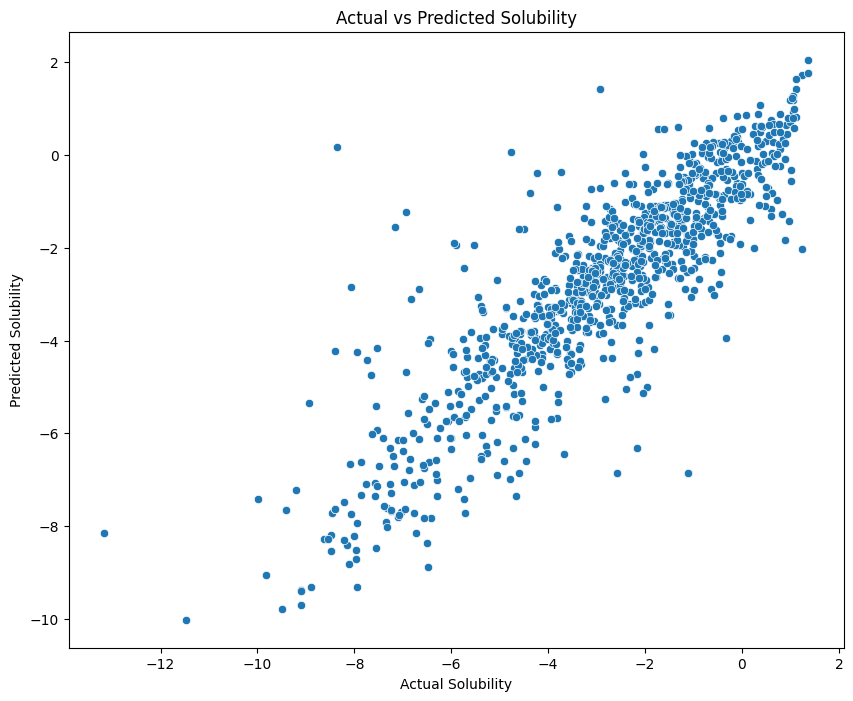

In [160]:
# Plots to observe the distribution of predicted values
#a scatter plot of predictions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='actual_solubility', y='predicted_solubility', data=predictions)
plt.title('Actual vs Predicted Solubility')
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesScatter_plot.png')
plt.show()




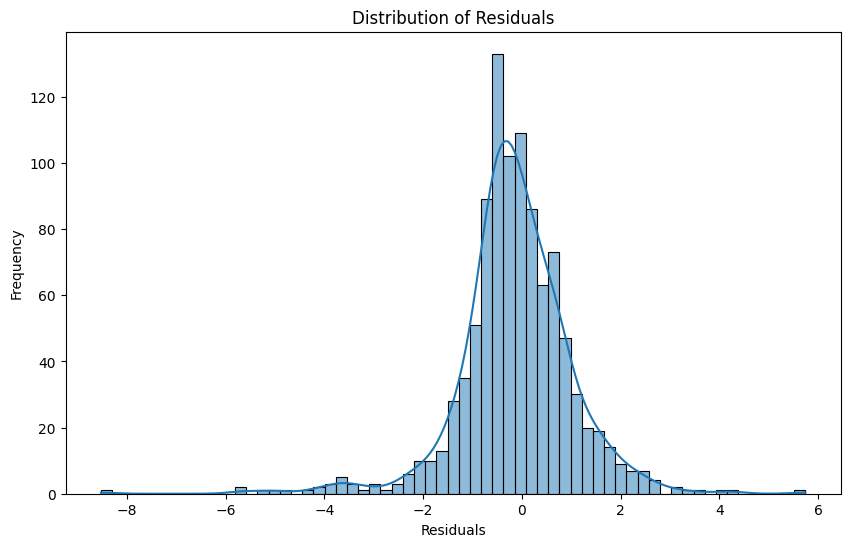

In [162]:
# Calculate residuals
predictions['Residuals'] = predictions['actual_solubility'] - predictions['predicted_solubility']

# Create histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(predictions['Residuals'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesResidual_plot.png')
plt.show()


The residual is a crucial metric calculated by taking the difference between the predicted values and the actual values. Visualizing the residuals provides valuable insights into the accuracy of predictions, especially in understanding how much the predicted values deviate from the actual ones.

In our analysis, we observed that the majority of predictions differed from the actual values by approximately -1.8. This indicates a consistent pattern of underestimating the solubility levels in our model.







In [169]:
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem
import numpy as np
from sklearn.decomposition import PCA


# Morgan Fingerprint funtion
def generate_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    finger_prints = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    array = np.zeros((1,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(finger_prints, array)
    return array

# Threshold set for hERG inhibitors
hERG_blockers_threshold = 0.5

output['Fingerprint'] = output['input'].apply(generate_fingerprint)

fingerprints = np.vstack(output['Fingerprint'])
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(fingerprints)

output.head()


,key,input,predicted_solubility,Fingerprint
0,ZCJLOOJRNPHKAV-ONEGZZNKSA-N,OC(=O)/C=C/c1occc1,-0.740,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,DYJIIMFHSZKBDY-UHFFFAOYSA-N,CC(C)(COC(=O)c1ccccc1)COC(=O)c2ccccc2,-4.720,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,TWIRQKNQTOUPOY-UHFFFAOYSA-I,[Na+].[Na+].[Na+].[Na+].[Na+].NC(=O)Nc1cc(Nc2n...,-1.706,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,MUPFEKGTMRGPLJ-UHFFFAOYSA-N,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,-0.298,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,DYGIZCLLGGJWQJ-UHFFFAOYSA-N,CCCCC(CC)CCCCCC(C)CCCC(O)=O,-6.182,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


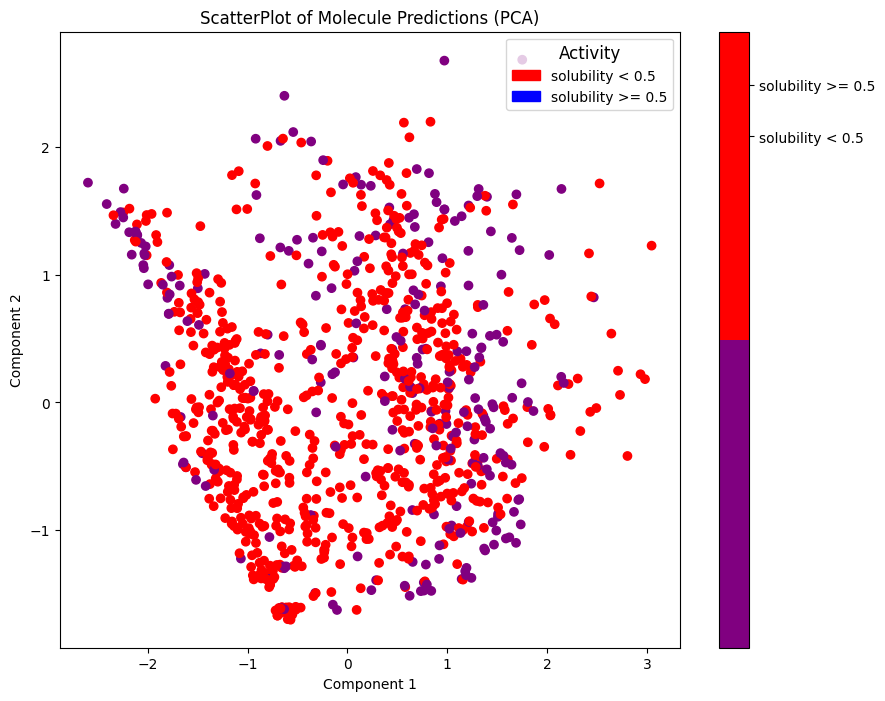

In [173]:
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

legend_colors = ['purple', 'red']

# Plot scatterplot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=output['predicted_solubility'], cmap=mcolors.ListedColormap(legend_colors))
plt.title('ScatterPlot of Molecule Predictions (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

legend_labels = ['solubility < 0.5', 'solubility >= 0.5']
legend_colors = ['red', 'blue']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right', title='Activity', title_fontsize='large')

# Set colorbar ticks and labels
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(legend_labels)
plt.show()


The scatterplot visually represents the spatial arrangement of molecules in a two-dimensional space, achieved through dimensionality reduction. The proximity of data points suggests similarities in molecular properties, particularly in terms of their fingerprints, which could imply shared characteristics in solubility.

The color palette utilized in the plot serves a crucial role in segmenting regions based on prediction probabilities. Specifically, regions depicted in red correspond to probabilities below 0.5, indicating a tendency towards lower solubility levels. Conversely, areas shaded in blue represent probabilities at or above 0.5, reflecting higher solubility levels. This color-based distinction highlights a notable prevalence of molecules with lower solubility characteristics within the dataset.

This insight derived from the plot could inform further investigations into the underlying factors influencing solubility patterns within the molecular dataset. Such analyses could be instrumental in refining strategies for drug development, formulation optimization, or environmental impact assessments related to solubility profiles.













